In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

Будем учиться классифицировать жанры музыки, полузуюсь не аудио дорожками, а уже осмысленными признаками (правда, не все из них имеют понятные названия). Сами данные можно найти [здесь](https://www.kaggle.com/purumalgi/music-genre-classification). Будем использовать файл `train.csv`. Нашей задачей будет предсказание переменной `Class` (жанр песни) при помощи деревьев решений. Можно попробовать также другие методы классификации, которые мы прошли, и сравнить результаты. При обучении всех моделей не забывайте про разделение на тренировку и тест (или кросс валидацию [ссылка](https://www.youtube.com/watch?v=fSytzGwwBVw)).

### Задание 1. EDA (10 баллов)

Как обычно, начнем с того, что посмотрим на наши данные: типы переменных, пропущенные значения, баланс классов и все такое. Ваш ход:

In [13]:
data = pd.read_csv("../data/train.csv")
data.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

In [15]:
data.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,17568.000000,17996.000000,17996.000000,15982.000000,17996.000000,17996.000000,17996.000000,17996.000000,13619.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000,17996.000000
mean,44.512124,0.543433,0.662777,5.952447,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,2.007445e+05,3.924039,6.695821
std,17.426928,0.166268,0.235373,3.196854,4.049151,0.480949,0.083576,0.310632,0.304048,0.159212,0.240195,29.571527,1.119891e+05,0.361618,3.206073
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,33.000000,0.432000,0.509000,3.000000,-9.538000,0.000000,0.034800,0.004300,0.000089,0.097500,0.297000,99.620750,1.663370e+05,4.000000,5.000000
50%,44.000000,0.545000,0.700000,6.000000,-7.016000,1.000000,0.047400,0.081400,0.003910,0.129000,0.481000,120.065500,2.091600e+05,4.000000,8.000000
75%,56.000000,0.659000,0.860000,9.000000,-5.189000,1.000000,0.083000,0.434000,0.200000,0.258000,0.672000,141.969250,2.524900e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


Посмотрим на пропущенные значения и выбросы

In [16]:
data.isnull().sum()

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

<Axes: >

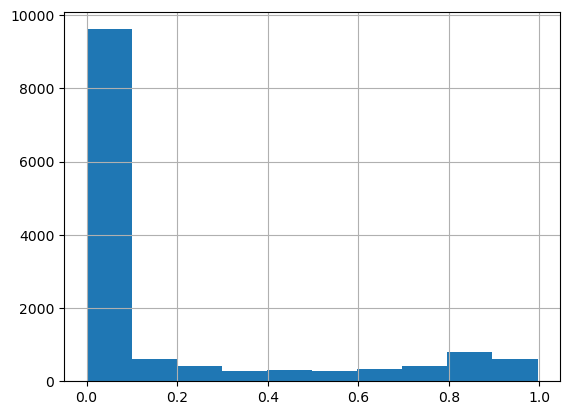

In [17]:
data.instrumentalness.hist()

На 17996 строк пропущенных значений instrumentalness очень много. Учитывая распределение, предлагаю заменить пропущенные на медиану, а строки с пропущенным значением Popularity и key убрать

In [18]:
data.dropna(subset=['Popularity', 'key'], inplace=True)

In [19]:
median = data["instrumentalness"].median()
data["instrumentalness"] =  data["instrumentalness"].fillna(median)

In [20]:
data.isnull().sum()

Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

<Axes: >

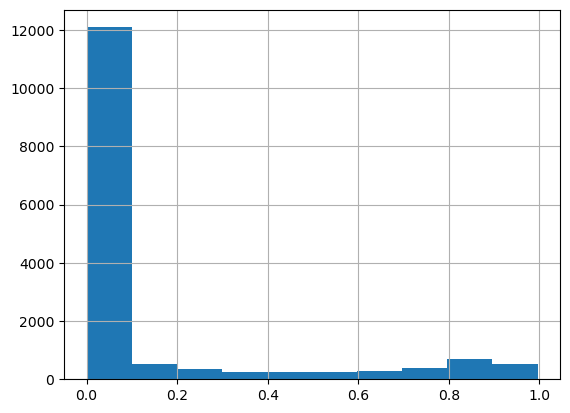

In [21]:
data.instrumentalness.hist()

Распределение instrumentallnes не сильно изменилось. Оставляем

Мы видим несколько факторных признаков. Сделаем их character

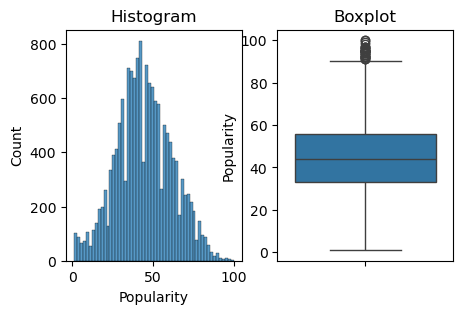

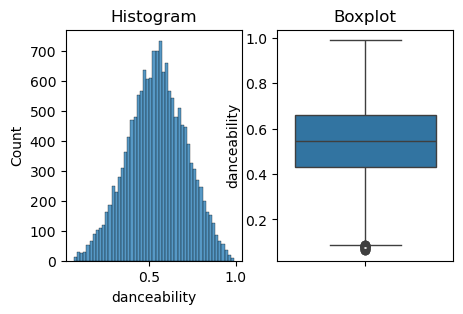

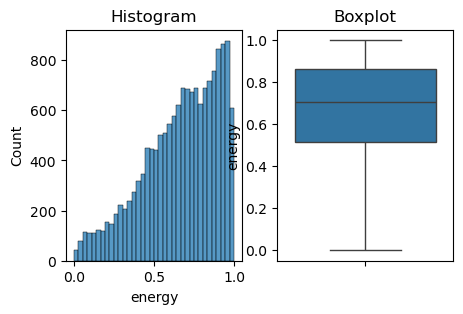

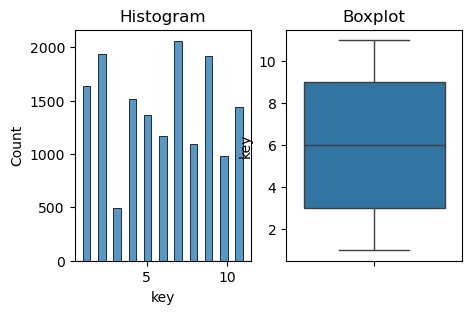

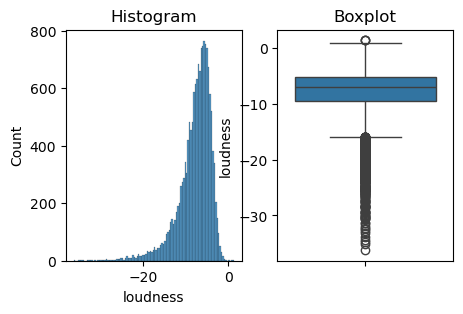

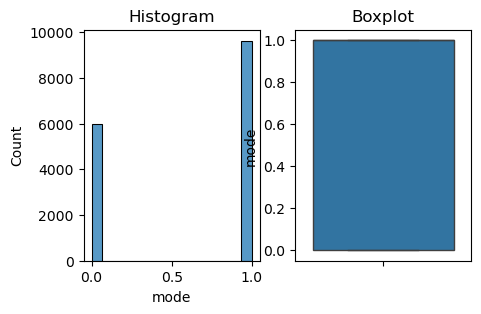

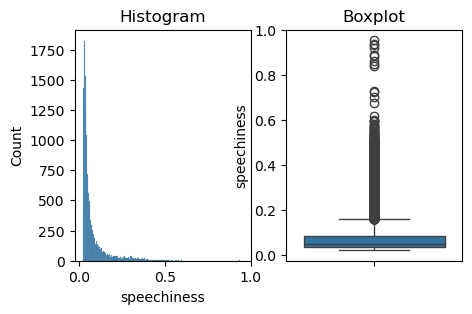

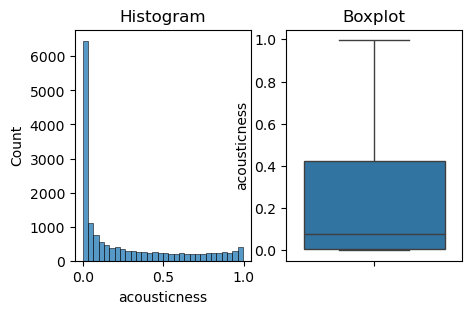

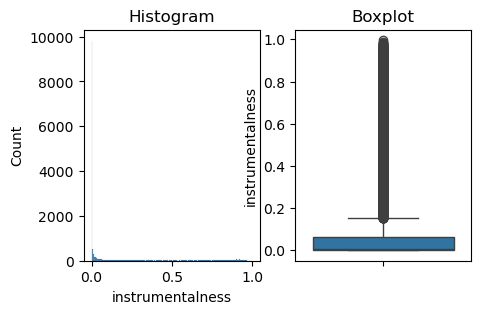

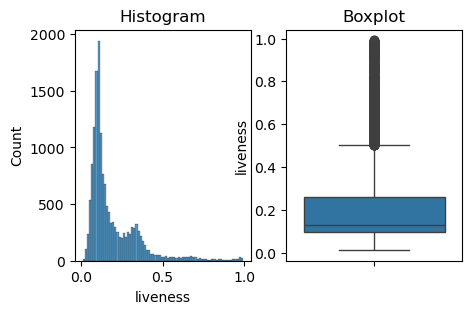

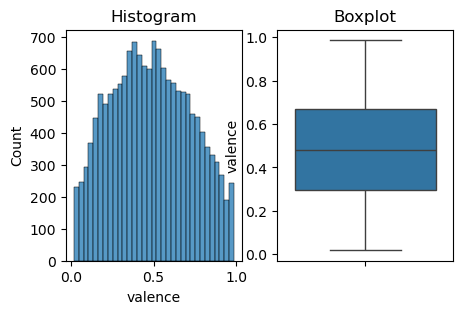

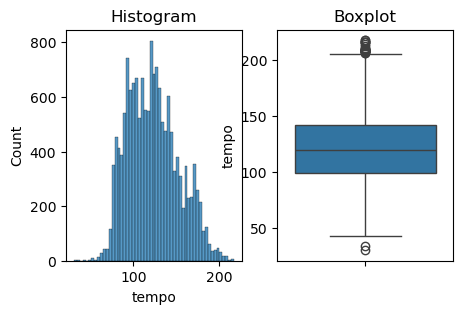

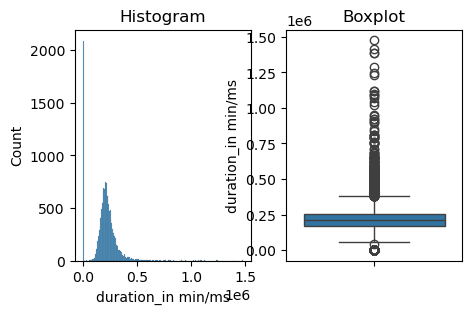

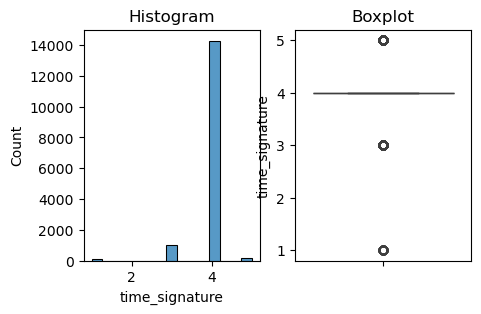

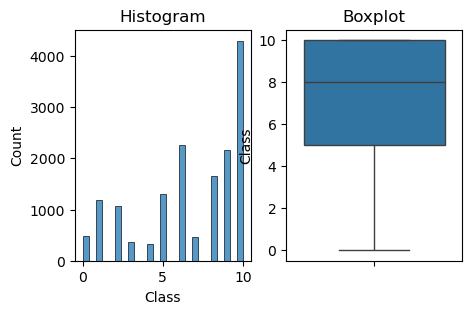

In [22]:
numeric_cols = data.select_dtypes(include=['number'])
for column in numeric_cols.columns:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 3))
    sns.histplot(data[column], ax=ax1)
    ax1.set_title('Histogram')
    sns.boxplot(data[column], ax=ax2)
    ax2.set_title('Boxplot')
    plt.show()


Посмотрим отдельно на колонки duration и speechiness

<Axes: >

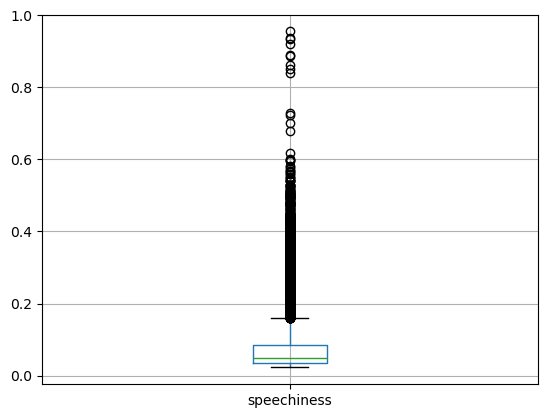

In [23]:
data[["speechiness"]].boxplot()

In [24]:
data[data['speechiness'] > 0.6]

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
853,Gwendolyn Brooks,"Beverly Hills, Chicago",10.0,0.587,0.0595,11.0,-26.964,1,0.730,0.8570,0.004290,0.1280,0.376,172.180,136867.0,3,5
1301,Langston Hughes,Dreams,8.0,0.745,0.1020,2.0,-19.061,1,0.937,0.9820,0.004290,0.1240,0.371,88.247,57443.0,4,5
3207,Netta,Supercalifragilisticexpialidocious,31.0,0.878,0.4600,8.0,-11.155,1,0.701,0.2270,0.004290,0.0810,0.937,82.003,183597.0,4,9
4313,Javi That's Me,CHERRY BLOSSOMS,37.0,0.595,0.7670,5.0,-13.412,0,0.678,0.1090,0.002120,0.5050,0.774,108.047,149029.0,4,6
6891,Countee Cullen,Heritage,5.0,0.565,0.2480,10.0,-17.369,0,0.862,0.9770,0.584000,0.3060,0.610,80.755,222760.0,4,5
8962,Margaret Walker,We Have Been Believers,4.0,0.619,0.0948,10.0,-23.295,0,0.723,0.6530,0.004290,0.3740,0.306,79.570,210160.0,3,5
9536,Margaret Walker,The Ballad of the Free,5.0,0.718,0.1110,10.0,-25.174,0,0.851,0.6340,0.004290,0.1180,0.298,120.820,172093.0,4,5
9653,Jimi Hendrix,Introduction (Live At Woodstock) - Live at The...,33.0,0.329,0.9290,8.0,-8.500,1,0.886,0.6880,0.007160,0.2630,0.133,86.880,141107.0,4,10
9956,Maya Angelou,Maya Angelou Interview with Ebony Moments - Li...,12.0,0.714,0.3930,2.0,-14.943,1,0.935,0.9140,0.000001,0.1670,0.469,114.094,304108.0,4,5
11358,Richard Pryor,Niggers vs. The Police,22.0,0.531,0.6740,8.0,-12.158,1,0.955,0.8220,0.004290,0.9080,0.468,78.778,101773.0,3,5


Большинство относятся к классу 5 (Hip-Hop) и 10 (Боливуд), что логично. Уберём только те строки, которые к этим классам не относятся.

In [25]:
data = data[(data['speechiness'] <= 0.6) | (data['Class'] == 5) | (data['Class'] == 10)]

<Axes: >

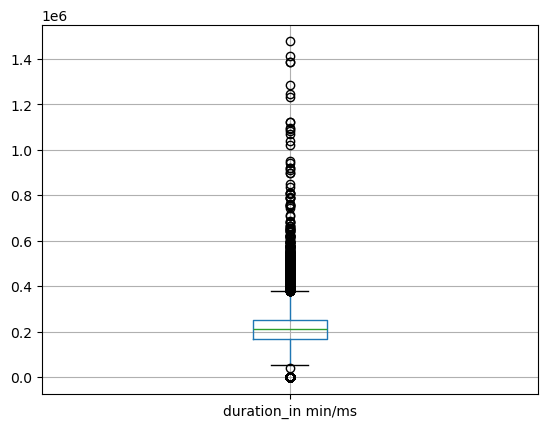

In [26]:
data[["duration_in min/ms"]].boxplot()

In [27]:
data[data['duration_in min/ms'] > 1000000]

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
696,Angel Bat Dawid,Harkening Etudes,22.0,0.622,0.394,10.0,-11.777,1,0.1150,0.8350,0.018100,0.1820,0.243,120.089,1083755.0,5,6
2028,Rajhesh Vaidhya,Nagumomu - Abheri - Adi,19.0,0.395,0.774,2.0,-7.731,0,0.0433,0.3460,0.841000,0.0898,0.762,91.578,1284507.0,4,6
2135,Soft Machine,Slightly All The Time - Remastered 2006,30.0,0.337,0.405,2.0,-10.535,0,0.0323,0.6860,0.901000,0.1210,0.206,135.756,1090787.0,4,10
2174,Pink Floyd,Echoes,57.0,0.285,0.322,6.0,-16.580,0,0.0440,0.3660,0.651000,0.1070,0.142,134.042,1412451.0,4,10
3145,Joe Russo's Almost Dead,Throwing Stones - Live 2016-12-30,17.0,0.382,0.443,2.0,-15.925,1,0.0474,0.3750,0.387000,0.8740,0.341,100.425,1069773.0,4,10
4242,Rush,2112: Overture / The Temples Of Syrinx / Disco...,52.0,0.344,0.790,2.0,-7.456,1,0.0983,0.0823,0.001700,0.1870,0.202,133.186,1233667.0,4,10
10047,All Traps On Earth,All Traps on Earth,23.0,0.256,0.466,7.0,-13.522,0,0.0403,0.2270,0.852000,0.1200,0.047,145.073,1095394.0,3,10
10054,Genesis,Supper's Ready,43.0,0.310,0.610,4.0,-9.415,0,0.0723,0.1470,0.000476,0.1790,0.144,88.132,1385907.0,4,10
10380,Satish Vyas,Awakening The Soul 2,16.0,0.271,0.480,7.0,-13.697,0,0.0328,0.8210,0.925000,0.0841,0.570,105.868,1041200.0,3,6
13222,Genesis,Supper's Ready - Digital Remastered 2008,43.0,0.310,0.610,4.0,-9.415,0,0.0723,0.1470,0.000476,0.1790,0.144,88.132,1385907.0,4,10


Если я правильно понял, то это продолжительность в мс. Большинство песен принадлежит к класс Боливуд, что возможно. Оставим их, удалив только те, что принадлежат к 6 классу.

In [28]:
data = data[(data['duration_in min/ms'] <= 1000000) | (data['Class'] == 10)]

### Задание 2. Обучение дерева решений (10 баллов)

Предобработайте признаки так, чтобы их можно было подать в модель дерева решений и обучите ее, постарайтесь подобрать оптимальные гиперпараметры, которые вам известны. Постарайтесь также обосновать выбор метрики в данном случае. При подборе гиперпараметров может помочь `GridSearchCV` [ссылка](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [29]:
X = data.drop(["Class", "Artist Name", "Track Name"], axis=1)
y = data["Class"]

In [30]:
X = pd.get_dummies(X, columns = ['key', 'time_signature'], dtype = 'int')
X.head()

,Popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,key_6.0,key_7.0,key_8.0,key_9.0,key_10.0,key_11.0,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,60.0,0.854,0.564,-4.964,1,0.0485,0.017100,0.004290,0.0849,0.8990,...,0,0,0,0,0,0,0,0,1,0
1,54.0,0.382,0.814,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,...,0,0,0,0,0,0,0,0,1,0
2,35.0,0.434,0.614,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,...,1,0,0,0,0,0,0,0,1,0
3,66.0,0.853,0.597,-6.528,0,0.0555,0.021200,0.004290,0.1220,0.5690,...,0,0,0,0,1,0,0,0,1,0
4,53.0,0.167,0.975,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,...,0,0,0,0,0,0,0,0,1,0


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

In [40]:
dt_model = GridSearchCV(DecisionTreeClassifier(criterion='gini'),
                          {"max_depth": [1, 3, 5, 7, 10, 13, 15, 20, 27],
                           "min_samples_leaf": [1, 3, 5, 10, 11, 13, 15]}
                        ).fit(X_train, y_train)

Надеюсь, я правильно предобработал дф для использования в ДТ. Не до конца понял, как это нужно делать из лекции.

In [41]:
y_pred = dt_model.predict(X_test)
y_pred1 = dt_model.predict_proba(X_test)
qual = accuracy_score(y_test, y_pred)
qual1 = roc_auc_score(y_true=y_test, y_score=y_pred1, multi_class='ovr')

In [42]:
qual

0.4734144778987828

In [43]:
qual1

0.8605210713794004

По метрикам качества, если я правильно понимаю, лучше использовать эти две. Нам важно насколько часто наша модель указывает правильный класс (accuracy), и вероятность с которой наша модель отличит один класс от остальных (ROC_AUC + ovr).

### Задание 3. Другие модели (без баллов, просто если есть желание)

Проделайте операции из **Задания 2** с другими известными вам классификаторами. Стало ли лучше?

### Задание 4. (0.5 доп. балла)

Расскажите про свои любимые фильмы, мультики и тд.

1. Кубрик "Цельнометалическая оболочка" - смотреть только в переводе Гоблина. Отличная трагикомедия о войне во Вьетнаме
2. "Большой Лебовски" - опять же, лучше Гоблин. Исключительно из-за философии Лебовски, по которой хотелось бы жить
3. "Криминальное чтиво"